# Package Install

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras  import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Data Analysis

In [146]:
df=pd.read_csv('9_calories_data_2.csv')
df

,Condenser,Evaporator,RPM,Capacity
0,40,-35,1100,58.7
1,40,-30,1100,78.6
2,40,-25,1100,104.8
3,40,-20,1100,131.0
4,40,-15,1100,166.4
...,...,...,...,...
115,60,-30,3700,229.0
116,60,-25,3700,313.0
117,60,-20,3700,397.0
118,60,-15,3700,499.5


In [147]:
X=df.drop('Capacity',axis=1)
y=df['Capacity']

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def performance(y_actual,y_predict):
    MAE=mean_absolute_error(y_actual,y_predict)
    print('MAE',MAE)
    MSE=mean_squared_error(y_actual,y_predict)
    print('MSE',MSE)
    R2=1-(np.sum((np.subtract(y_predict,y_actual))**2)/np.sum((np.subtract(y_actual,(np.sum(y_actual)/len(y_actual))))**2))
    print('R2: {}'.format(R2))
    

In [149]:
def feature(b_input,n_degree):
    polynomial_converter=PolynomialFeatures(degree=n_degree,include_bias=False)
    poly_features=polynomial_converter.fit_transform(b_input)
    return poly_features

In [150]:
def score_normalize (n_data):
    mu=np.mean(n_data,axis=0)
    sigma=np.std(n_data,axis=0)
    X_norm=(n_data-mu)/sigma
    return (X_norm,mu,sigma)

In [151]:
a_cond=X['Condenser']
norm_cond,mu_cond,sigma_cond=score_normalize(a_cond)
a_eva=X['Evaporator']/100
norm_eva,mu_eva,sigma_eva=score_normalize(a_eva)
a_rpm=X['RPM']/1000
norm_rpm,mu_rpm,sigma_rpm=score_normalize(a_rpm)
X_normal=np.transpose([norm_cond, norm_eva,norm_rpm])

np.shape(X_normal)
# Ideal Data
X_input=X_normal
y_input=y
X_input=feature(X_input,5)
X_train,X_test,y_train,y_test=train_test_split(X_input,y_input,test_size=0.3,random_state=101)

scaler=StandardScaler()
scaler.fit(X_train)
scaler_X_train=scaler.transform(X_train)
scaler_X_test=scaler.transform(X_test)
#scaler_X_train=X_train
#scaler_X_test=X_test
# Test Value for performance cheeck
condenser=28
evaporator= -27
RPS=29
RPM=RPS*60
Real_value=134
Test_value=[[(condenser-mu_cond)/sigma_cond,(((evaporator/100)-mu_eva)/sigma_eva),((RPM/1000)-mu_rpm)/sigma_rpm]]
scaler_test=scaler.transform(feature(Test_value,5))
#scaler_test=Test_value
print(scaler_test)

[[-3.09194646e+00 -6.25001362e-01 -2.56682901e-01  1.02462095e+01
   1.62198948e+00  8.76858868e-01 -8.40308193e-01  1.83550036e-01
  -8.50585586e-01 -1.63707611e+01 -3.82383049e+00 -2.00142972e+00
  -6.06196575e-01 -4.13069851e-01 -1.31876399e-01 -1.31975425e-01
  -6.99495943e-03 -8.72853238e-02 -4.06259476e-01  4.85502572e+01
   8.45746138e+00  4.49610843e+00  1.11202135e+00  1.13402812e+00
  -1.75902427e-01  2.34486472e-01  2.49093213e-01  1.24414339e-01
   5.99815610e-02 -8.22242930e-01  5.16460739e-02 -5.96351297e-01
  -8.03157876e-03 -6.46106614e-01 -7.97983563e+01 -1.87280151e+01
  -9.84411954e+00 -3.29586812e+00 -2.28561511e+00 -7.91137517e-01
  -5.58266646e-01 -4.14524460e-01 -1.93230199e-01 -3.86918737e-01
  -4.81929055e-02 -1.07683865e-02  4.86810710e-02  1.98052348e-02
   2.72891855e-02 -4.30560476e-02  5.40843281e-02 -3.45266539e-02
  -2.76172057e-01 -3.84101429e-02 -5.13005864e-01]]


# History Plot

In [152]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()

# Neural Network Design 1

In [153]:
hidden_units1=5
hidden_units2=820
hidden_units3=820
hidden_units4=920
learning_rate=0.001


def build_model():
    model=Sequential([
        Dense(hidden_units1,kernel_initializer='normal',activation='relu'),
        Dropout(0.5),
        Dense(hidden_units2,kernel_initializer='normal',activation='relu'),
        Dropout(0.6),
        Dense(hidden_units3,kernel_initializer='normal',activation='relu'),
        Dropout(0.6),
        Dense(hidden_units4,kernel_initializer='normal',activation='relu'),
        Dense(1,kernel_initializer='normal',activation='linear'),
    ])
    return model
model=build_model()
msle=MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
history=model.fit(
    scaler_X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_split=0.2
)
y_pred=model.predict(scaler_X_test).tolist()


Epoch 1/1000
2/2 [==============================] - 4s 542ms/step - loss: 26.5251 - mean_squared_logarithmic_error: 25.6647 - val_loss: 27.2162 - val_mean_squared_logarithmic_error: 27.2162
Epoch 2/1000
2/2 [==============================] - 0s 88ms/step - loss: 23.3099 - mean_squared_logarithmic_error: 22.3263 - val_loss: 23.8189 - val_mean_squared_logarithmic_error: 23.8189
Epoch 3/1000
2/2 [==============================] - 0s 129ms/step - loss: 19.6198 - mean_squared_logarithmic_error: 19.4501 - val_loss: 20.1649 - val_mean_squared_logarithmic_error: 20.1649
Epoch 4/1000
2/2 [==============================] - 0s 94ms/step - loss: 17.0473 - mean_squared_logarithmic_error: 17.5988 - val_loss: 16.4603 - val_mean_squared_logarithmic_error: 16.4603
Epoch 5/1000
2/2 [==============================] - 0s 138ms/step - loss: 13.0861 - mean_squared_logarithmic_error: 14.5045 - val_loss: 13.0328 - val_mean_squared_logarithmic_error: 13.0328
Epoch 6/1000
2/2 [==============================] - 

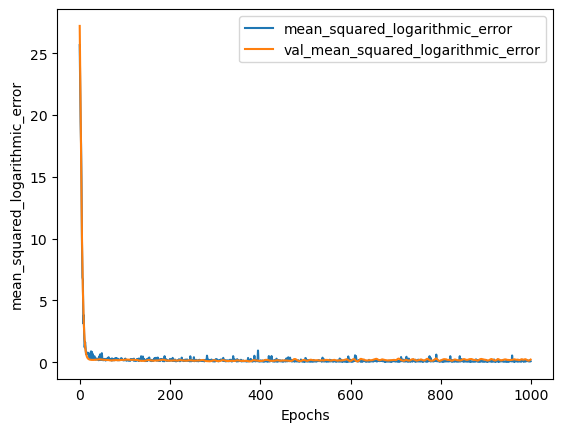

In [154]:
plot_history(history,'mean_squared_logarithmic_error')

In [155]:
performance(y_test_list,y_pred)

MAE 72.24282014634872
MSE 10632.860742991124
R2: -49.56012313945027


In [156]:
test_result=model.predict(scaler_test).tolist()
print(test_result)

1/1 [==============================] - 0s 109ms/step
[[1035.5648193359375]]
